In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils.data import load_df, load_df_with_names
from utils.metrics import f1_score, far, mar


In [2]:
list_of_df, _, file_names = load_df_with_names("./data/", "valve1")


In [3]:
def get_healthy_prefix_len(df): return df.index.get_loc(df[df.anomaly==1].index[0])

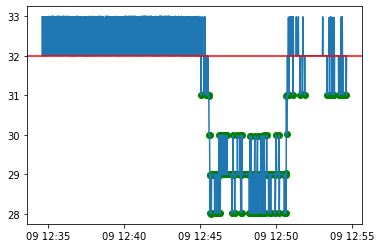

In [4]:
healthy_prefix_len = 400
df = list_of_df[-3]

x = df['Volume Flow RateRMS']
x_train =x[:healthy_prefix_len].values
plt.plot(x.index, x.values)
thr = pd.Series(x_train).quantile(q=0.01) - 0.2


an = x [x<thr]
plt.scatter(an.index, an, color = "green")
plt.axhline(pd.Series(x_train).quantile(q=0.01), color='r')
# plt.plot(df.anomaly)



In [5]:
thr

31.8

### All

In [6]:
def plot_actual_and_predicted(df, file_name, prediction):
    y_test = df.anomaly
    fig, axs = plt.subplots(2, 1, figsize=(20,10))
    temperatures = df['Volume Flow RateRMS']
    axs[0].plot(temperatures)
    axs[1].plot(temperatures)

    y = pd.Series(prediction)
    anomalies_indecies = y.index[y == 1]
    axs[0].scatter(anomalies_indecies, temperatures[anomalies_indecies], color='r')
    axs[0].set_title("Predicted" + " " + file_name)

    y = pd.Series(y_test)
    anomalies_indecies = pd.Series(y.values).index[y == 1]
    axs[1].scatter(df.index[anomalies_indecies], temperatures[anomalies_indecies], color='r')
    axs[1].set_title("Actual" + " " + file_name)

    plt.show()

In [7]:
 len(file_names), len(list_of_df)

(16, 16)

In [8]:
thr

31.8

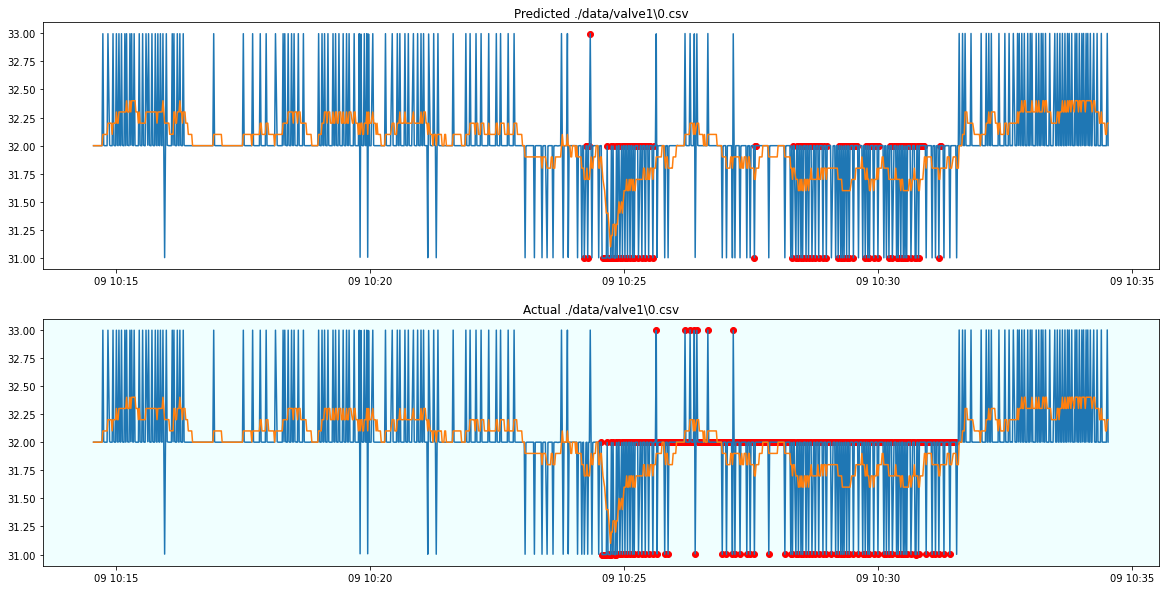

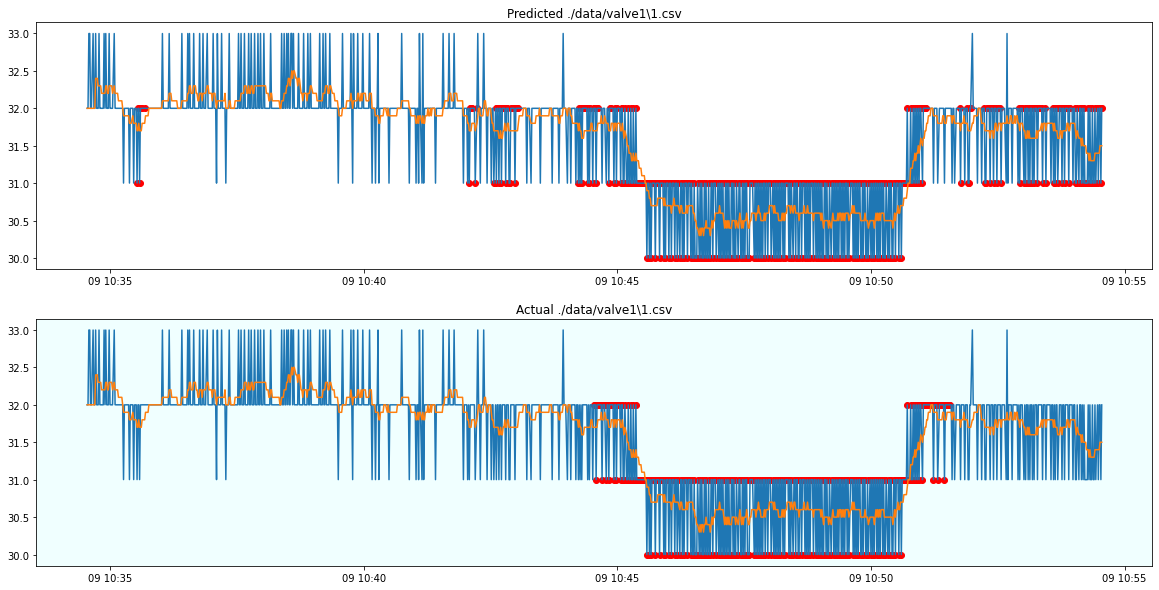

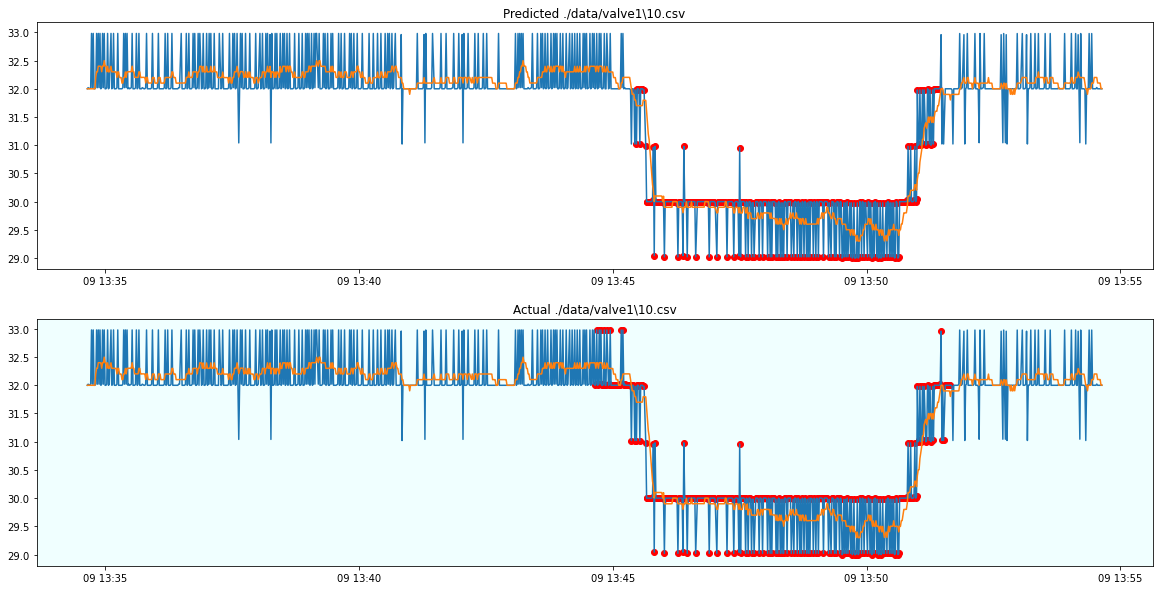

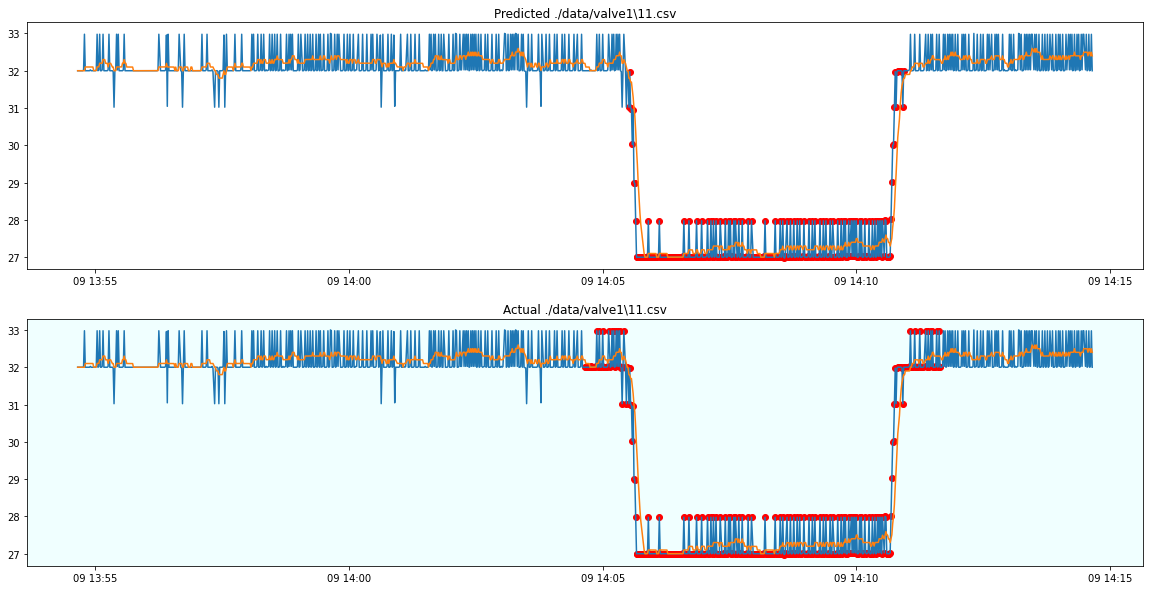

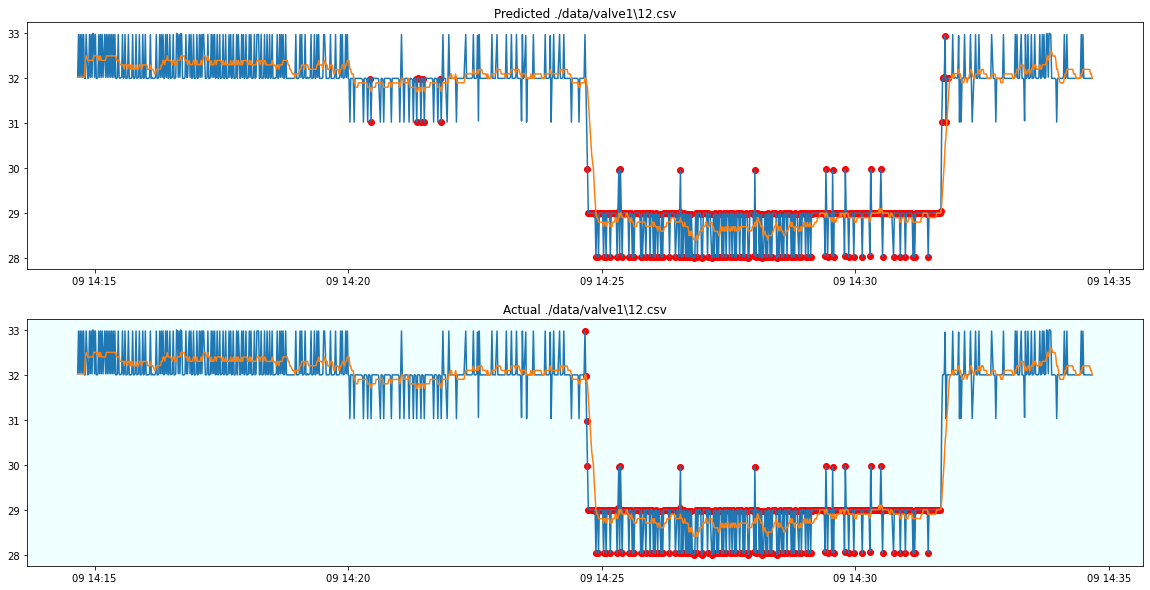

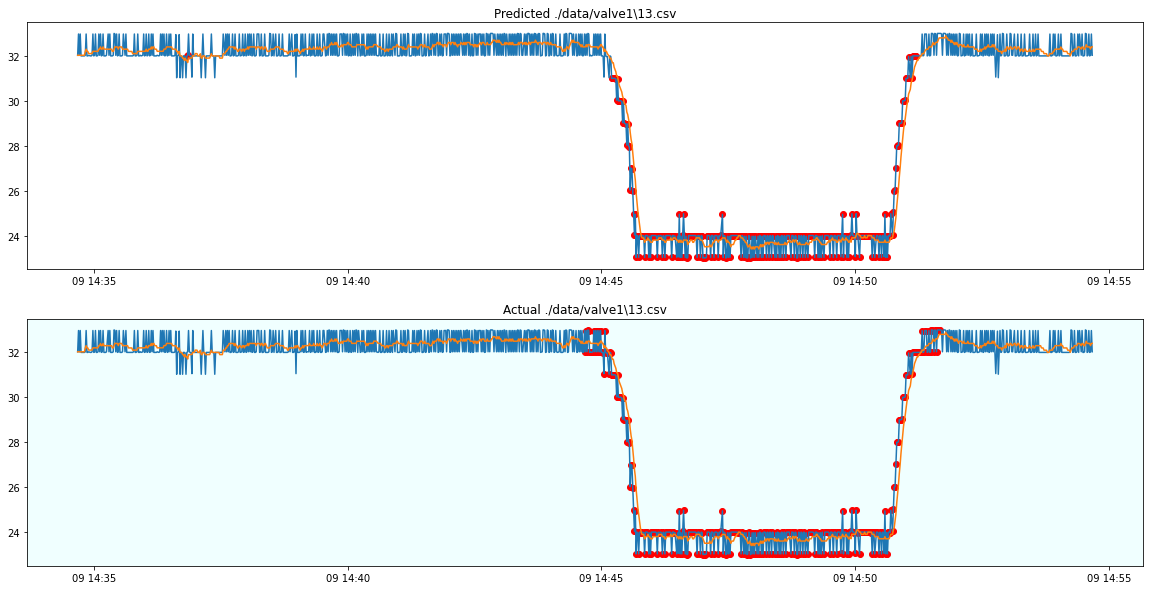

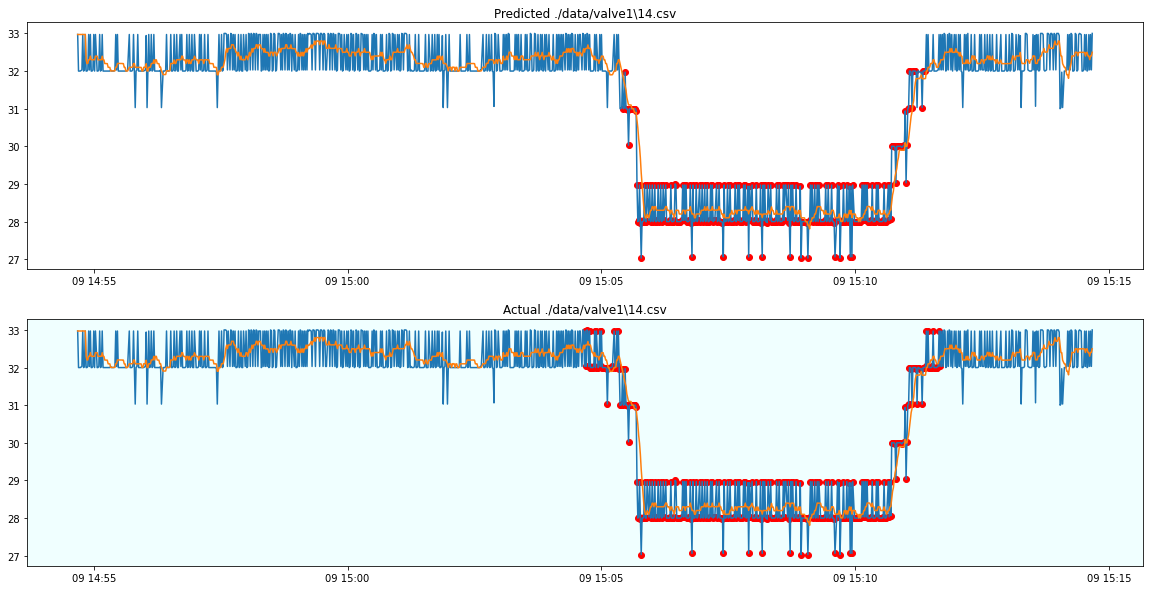

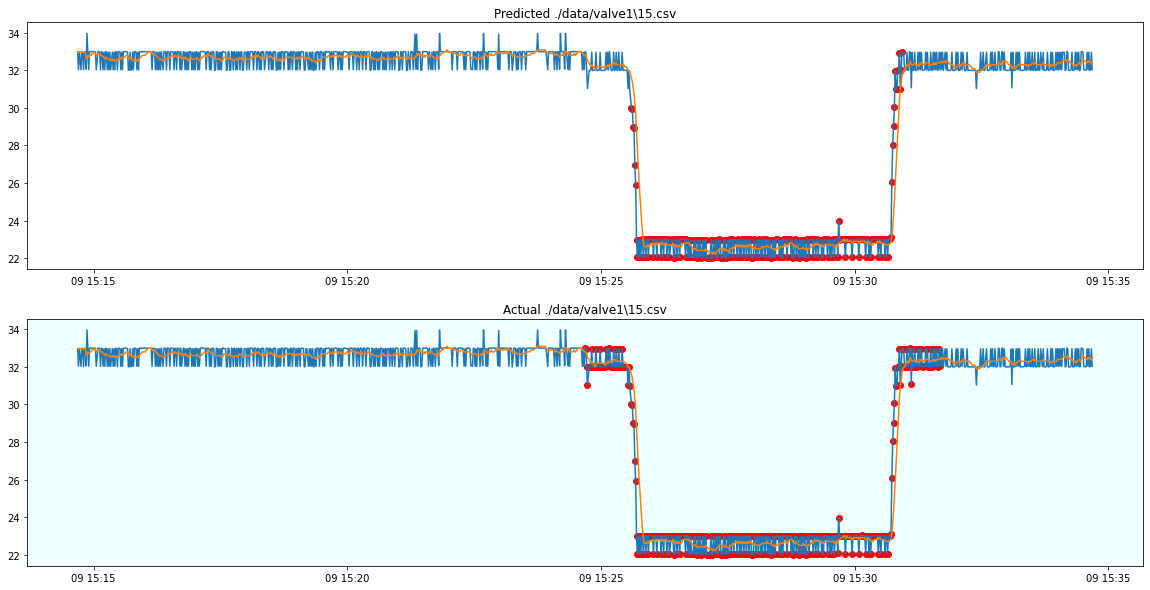

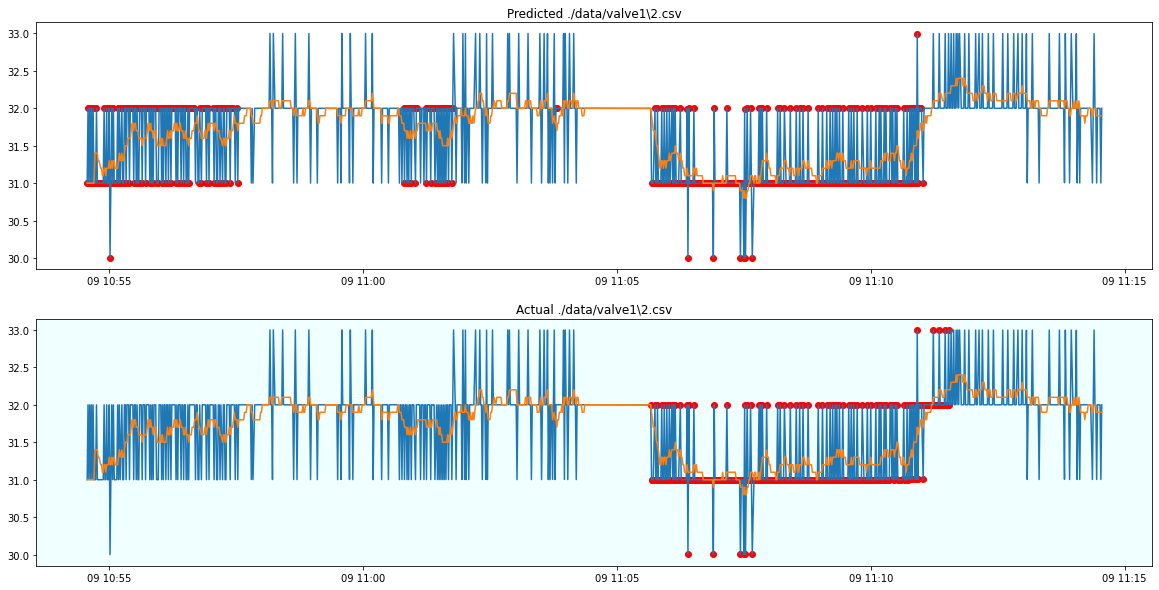

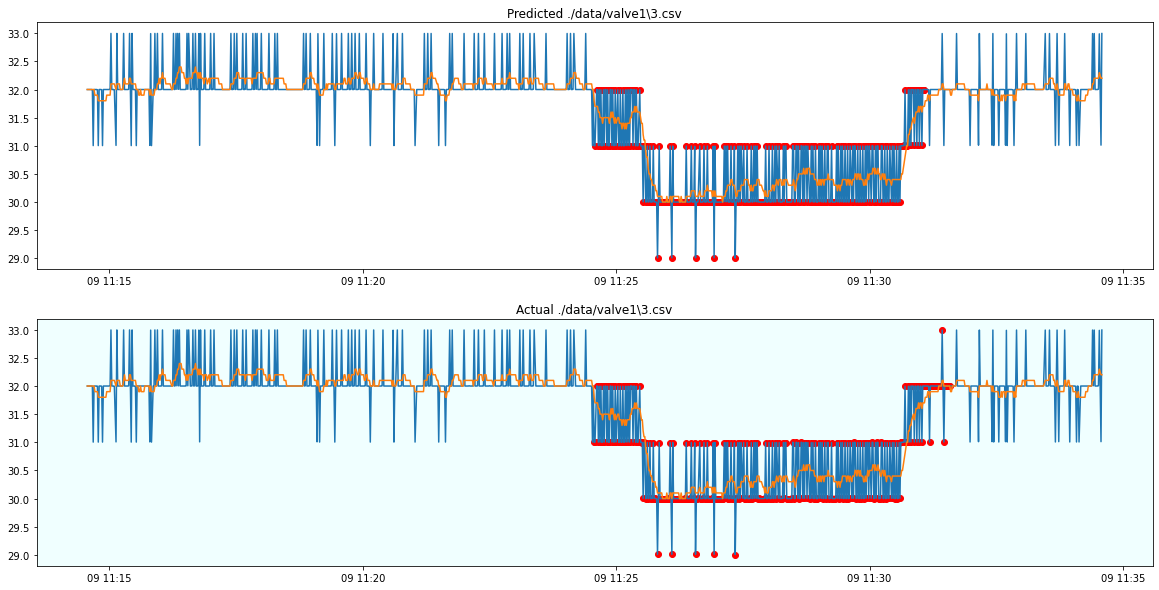

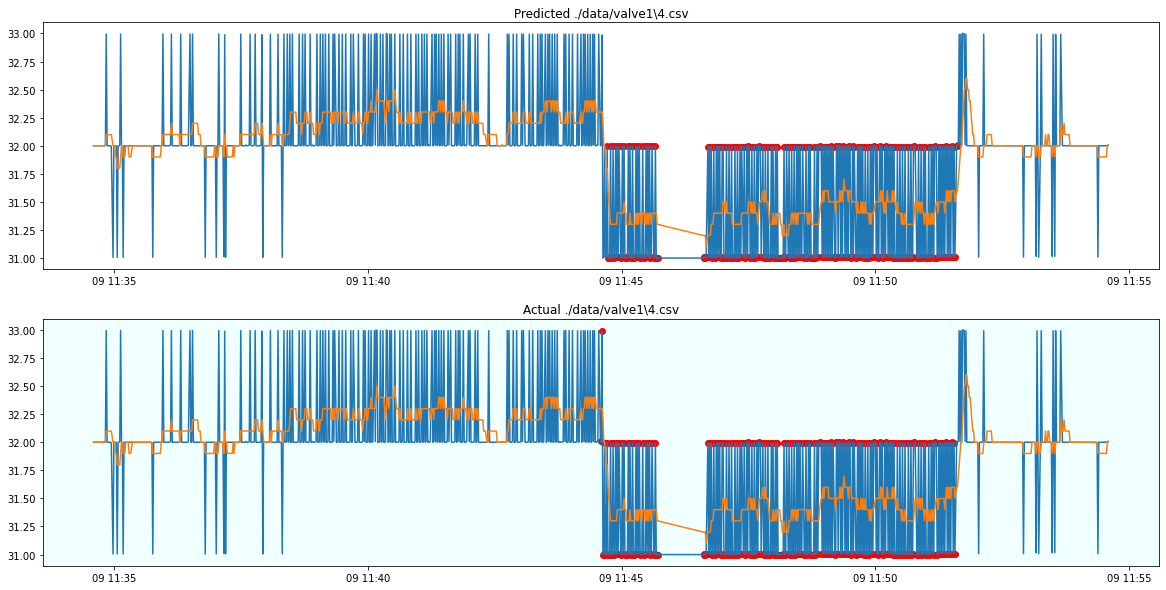

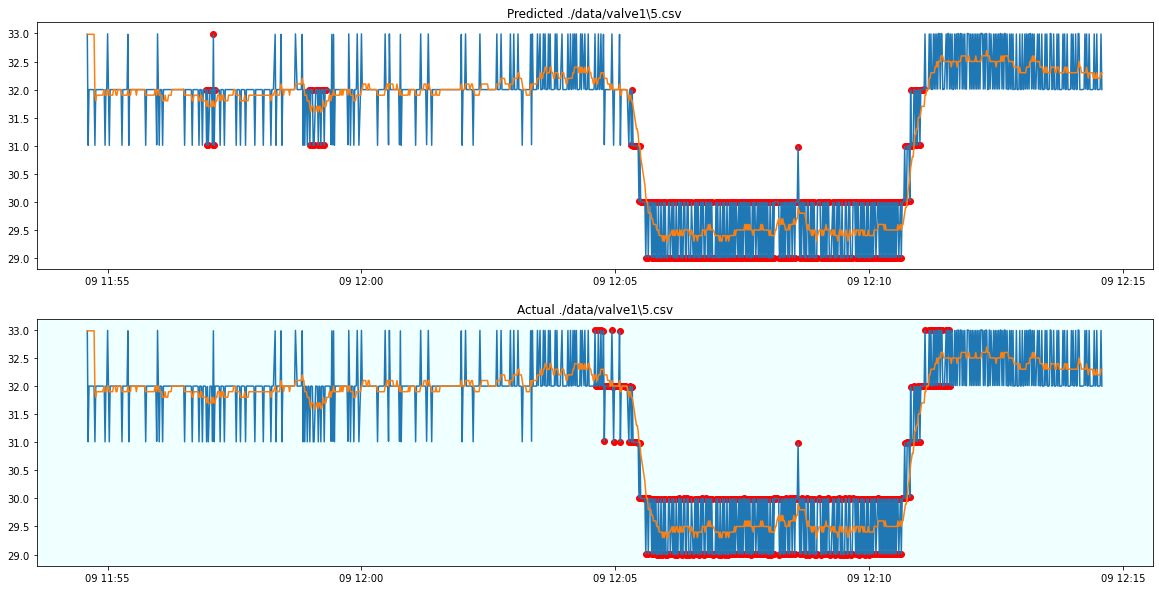

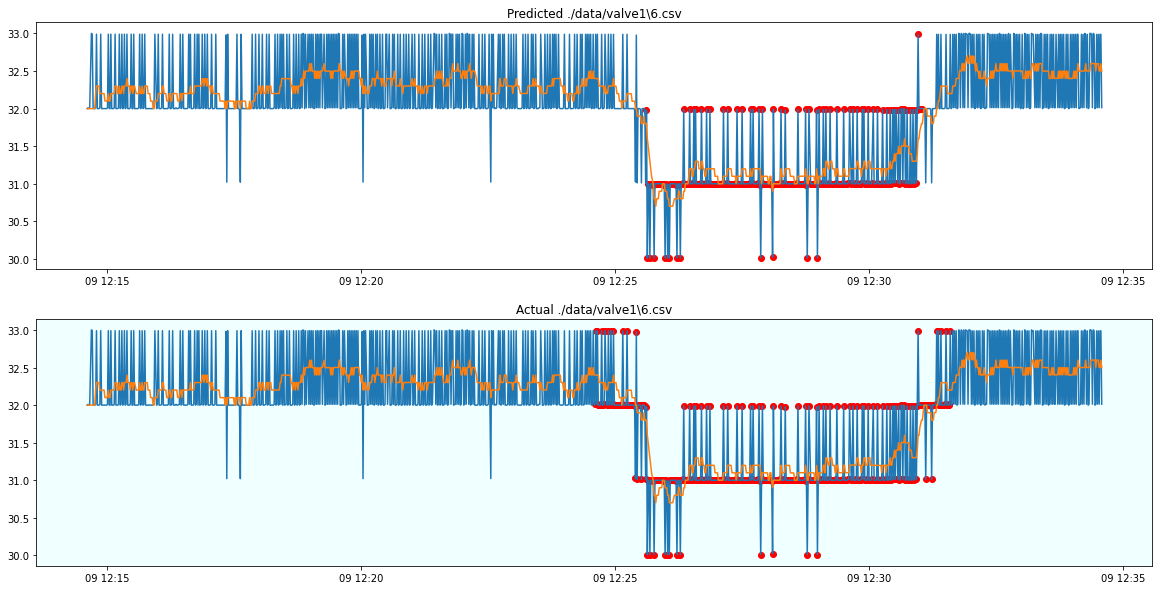

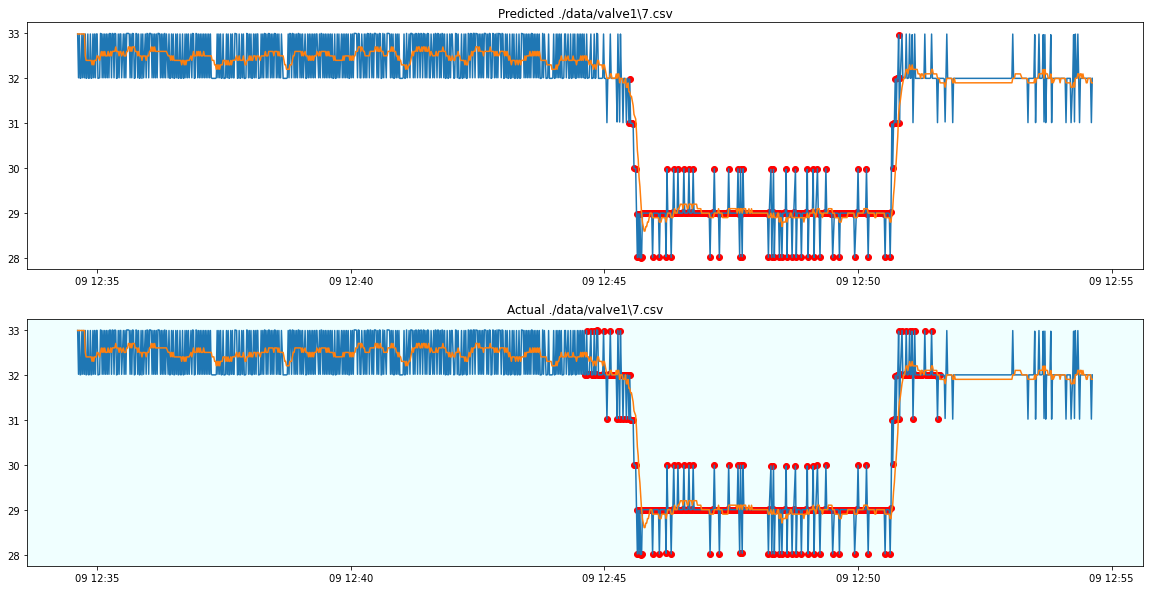

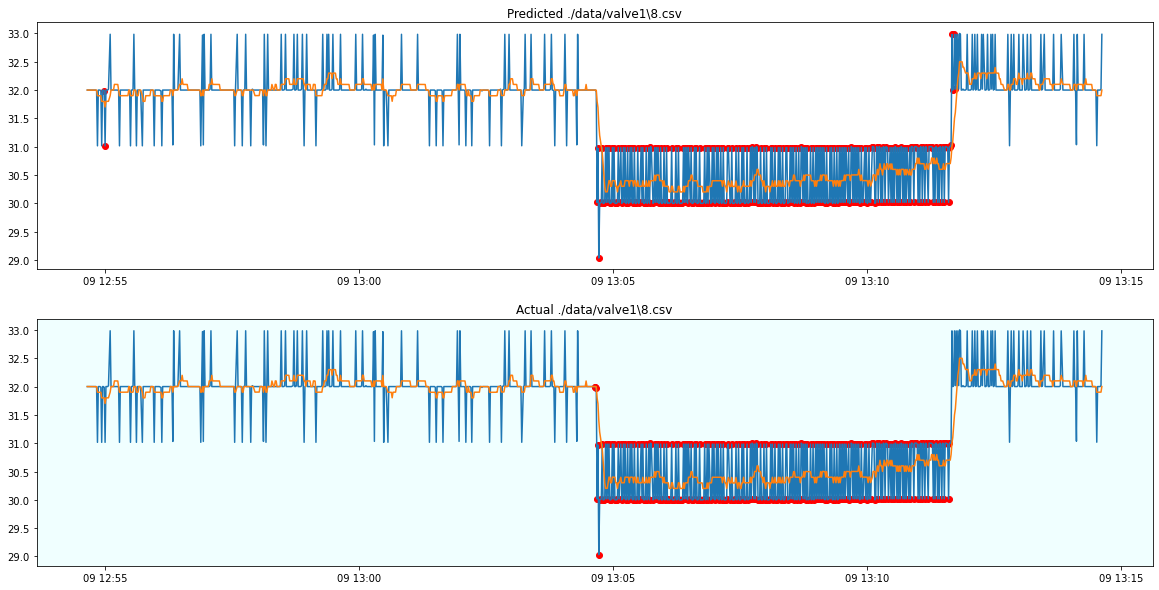

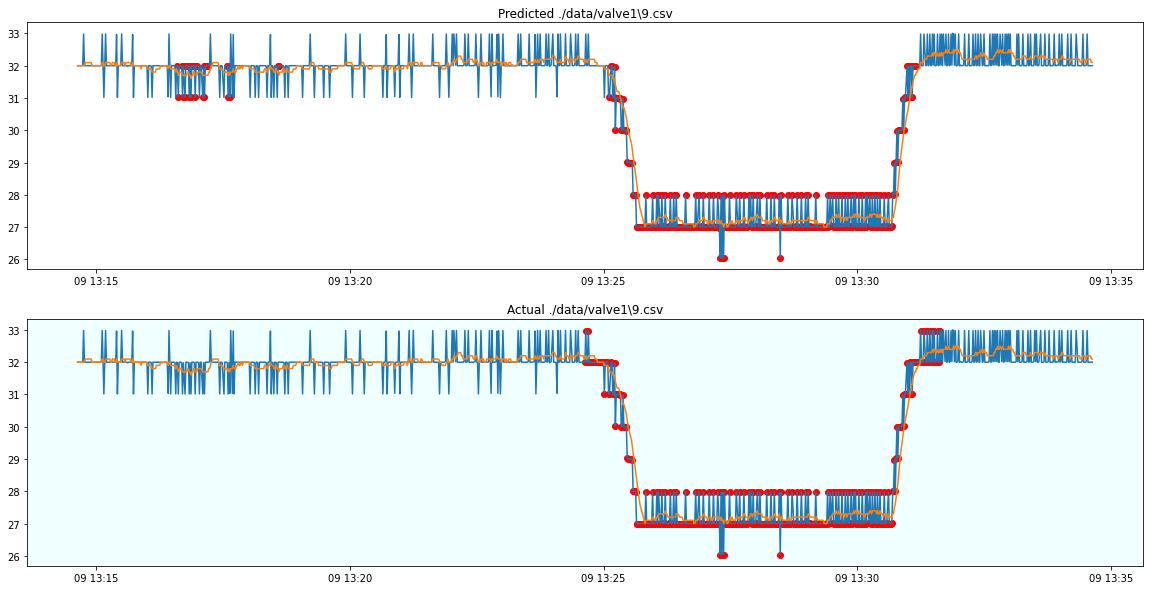

In [9]:
metrics={}
for i in range(len(file_names)):
    file_name = file_names[i]
    df = list_of_df[i]
    x = df['Volume Flow RateRMS']
    smoothed = x.rolling(window = 10).mean().fillna(x.iloc[0])
    prediction = smoothed < thr    
    
    y_test = df.anomaly
    fig, axs = plt.subplots(2, 1, figsize=(20,10))
    temperatures = df['Volume Flow RateRMS']
    axs[0].plot(temperatures)
    axs[1].plot(temperatures)
    
    
    axs[1].plot(smoothed)
    axs[0].plot(smoothed)

    y = pd.Series(prediction)
    anomalies_indecies = y.index[y == 1]
    axs[0].scatter(anomalies_indecies, temperatures[anomalies_indecies], color='r')
    axs[0].set_title("Predicted" + " " + file_name)

    y = pd.Series(y_test)
    anomalies_indecies = pd.Series(y.values).index[y == 1]
    axs[1].scatter(df.index[anomalies_indecies], temperatures[anomalies_indecies], color='r')
    axs[1].set_title("Actual" + " " + file_name)

    axs[1].set_facecolor("azure")
    
    f1 = f1_score(y_test, prediction)
    far_score = far(y_test, prediction)
    mar_score = mar(y_test, prediction)
    metrics[file_name[7:]] = (f1, far_score, mar_score)
        
    plt.show()
    
    

In [10]:
from utils.data import show_score_table

show_score_table(metrics)

metric | valve1\0.csv | valve1\1.csv | valve1\10.csv | valve1\11.csv | valve1\12.csv | valve1\13.csv | valve1\14.csv | valve1\15.csv | valve1\2.csv | valve1\3.csv | valve1\4.csv | valve1\5.csv | valve1\6.csv | valve1\7.csv | valve1\8.csv | valve1\9.csv
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
F1 |0.6 | 0.78 | 0.92 | 0.87 | 0.97 | 0.92 | 0.91 | 0.87 | 0.72 | 0.96 | 0.99 | 0.87 | 0.87 | 0.87 | 0.99 | 0.89
FAR |0.01 | 0.21 | 0.0 | 0.0 | 0.03 | 0.0 | 0.0 | 0.0 | 0.28 | 0.0 | 0.0 | 0.04 | 0.0 | 0.0 | 0.01 | 0.04
MAR |0.56 | 0.11 | 0.14 | 0.23 | 0.01 | 0.14 | 0.17 | 0.24 | 0.1 | 0.07 | 0.02 | 0.17 | 0.22 | 0.23 | 0.01 | 0.14

#### Вывод

Средняя скользящая по Volume flow RTS упала ниже первого перцентиля здоровых данных - хороший сигнал об аномалиях в valve1. Метрики как у LSTM